PCA
Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.

Task 2: Dimensionality Reduction with PCA:

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.

Task 3: Clustering with Original Data:

1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

Task 4: Clustering with PCA Data:

1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

Task 5: Comparison and Analysis:

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [4]:
# Load data
df = pd.read_csv('/content/wine.csv')
df.columns = [col.strip() for col in df.columns]
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

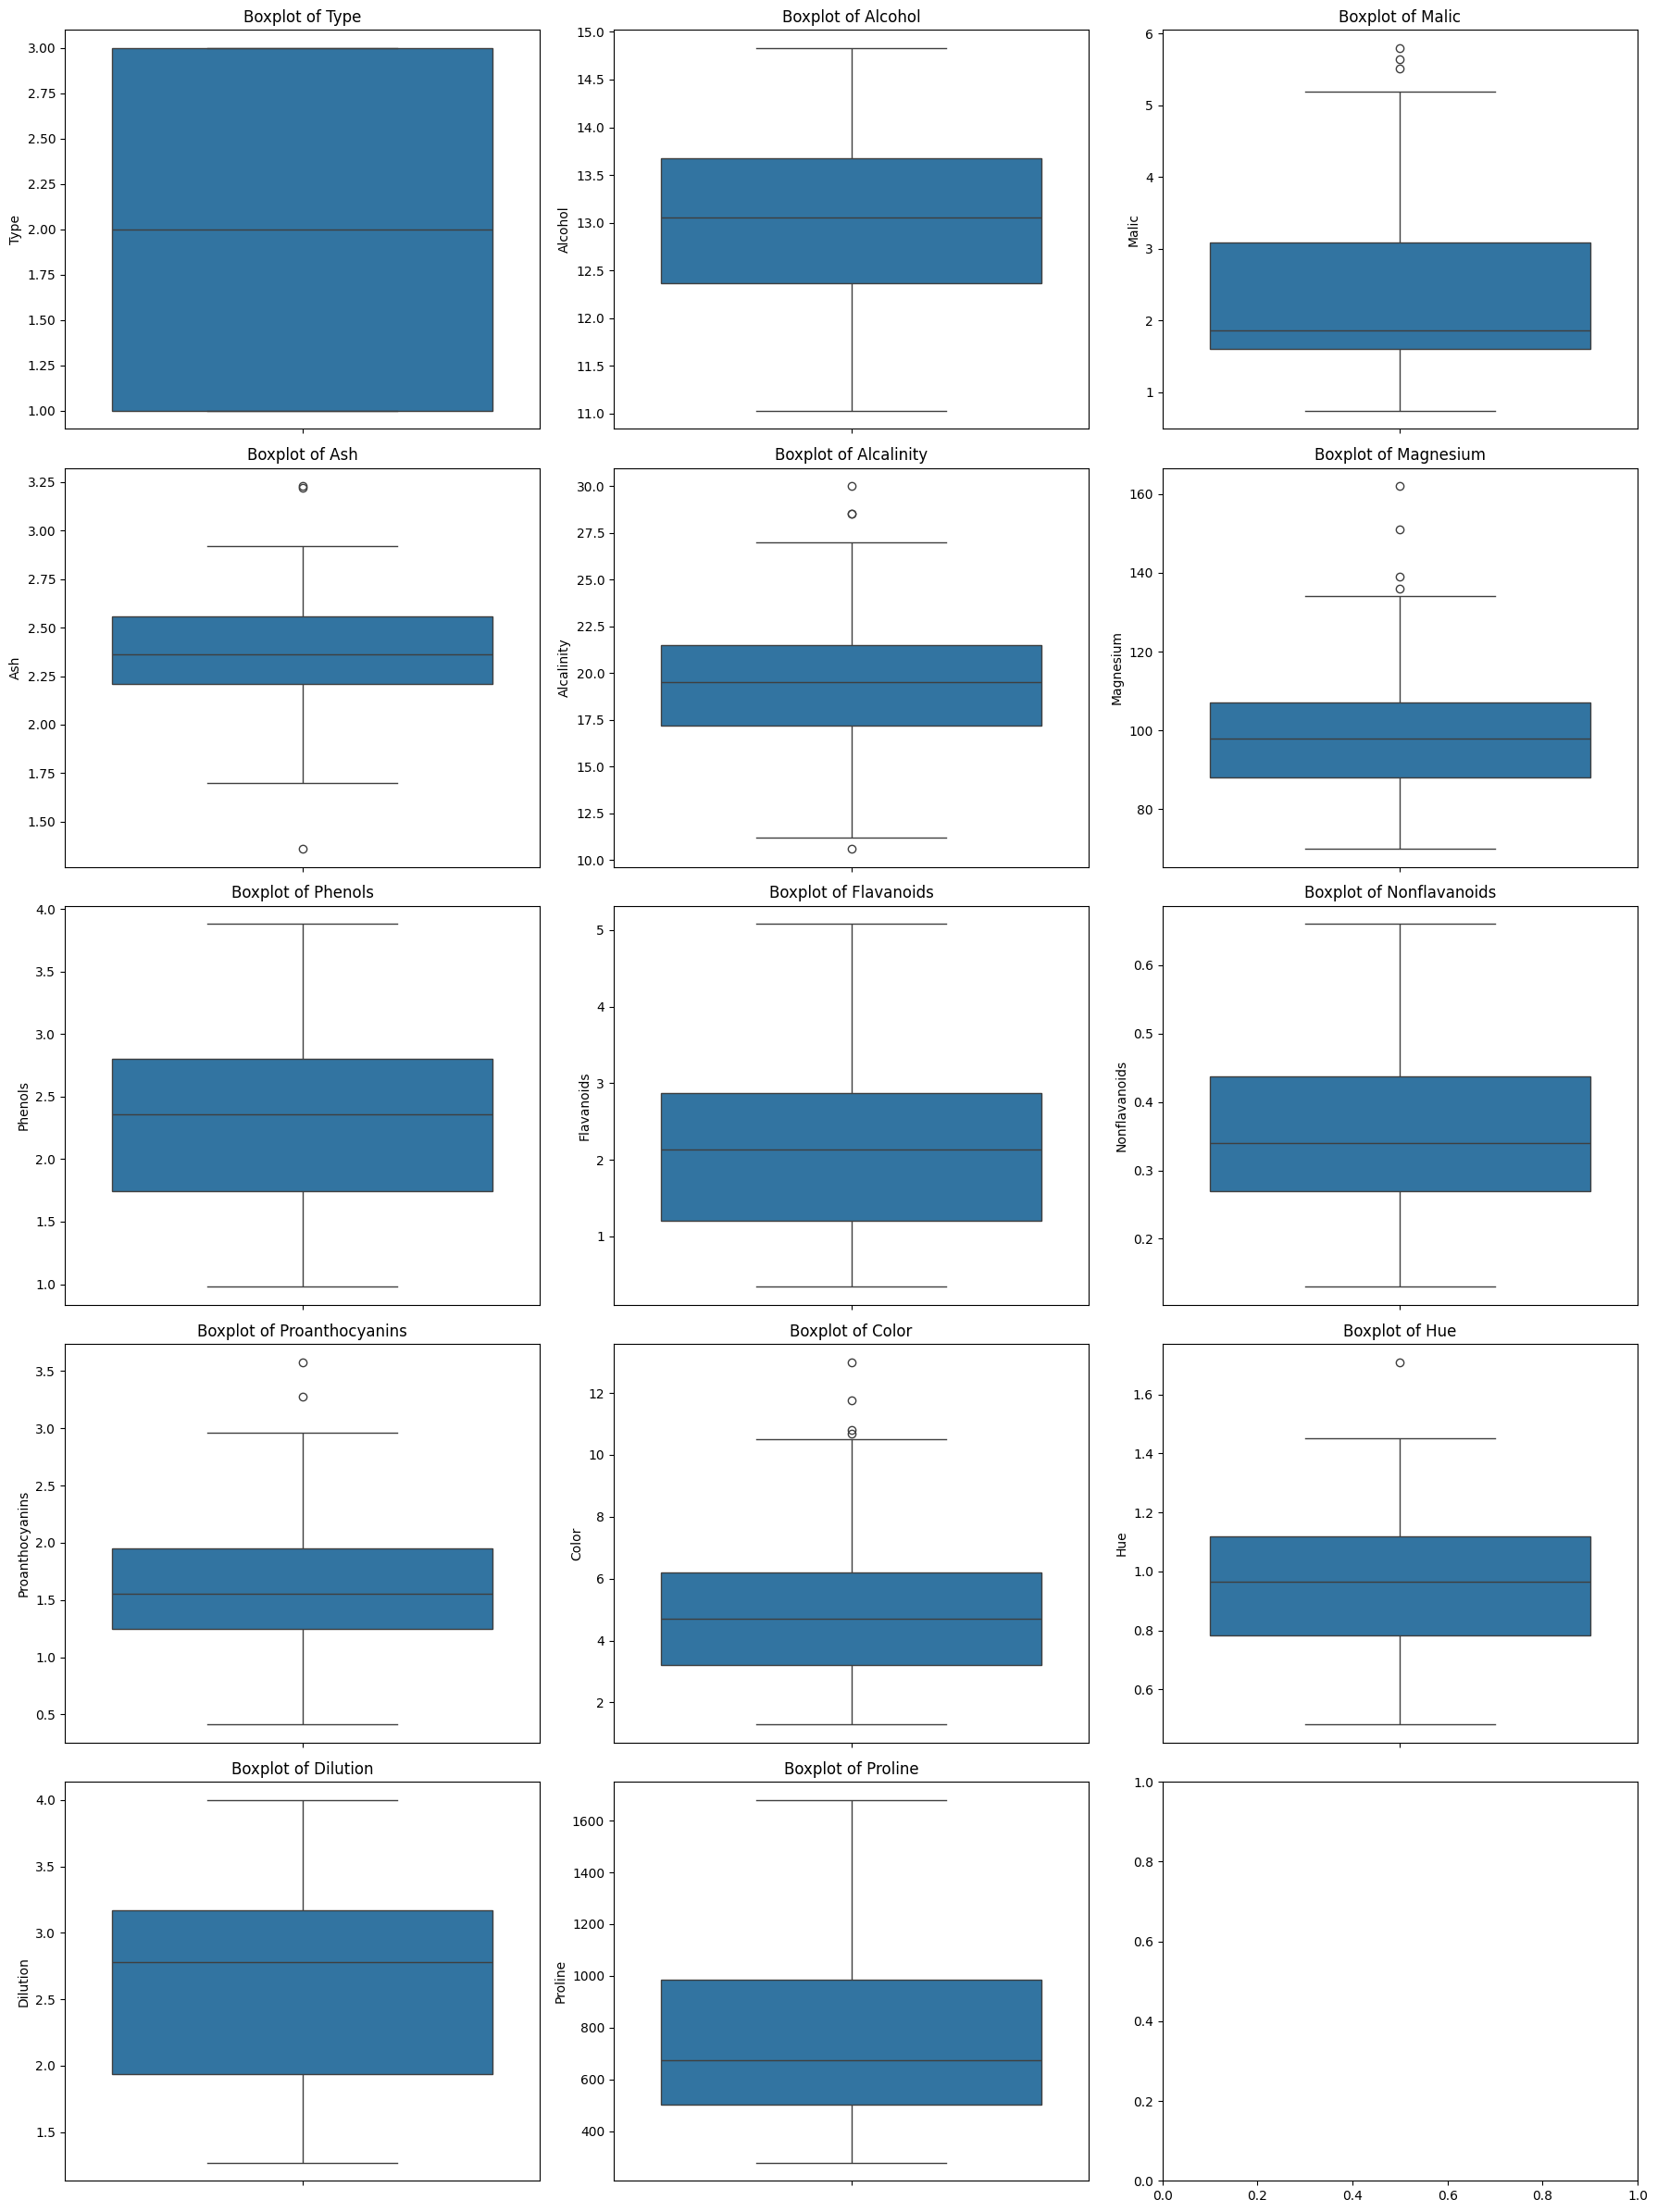

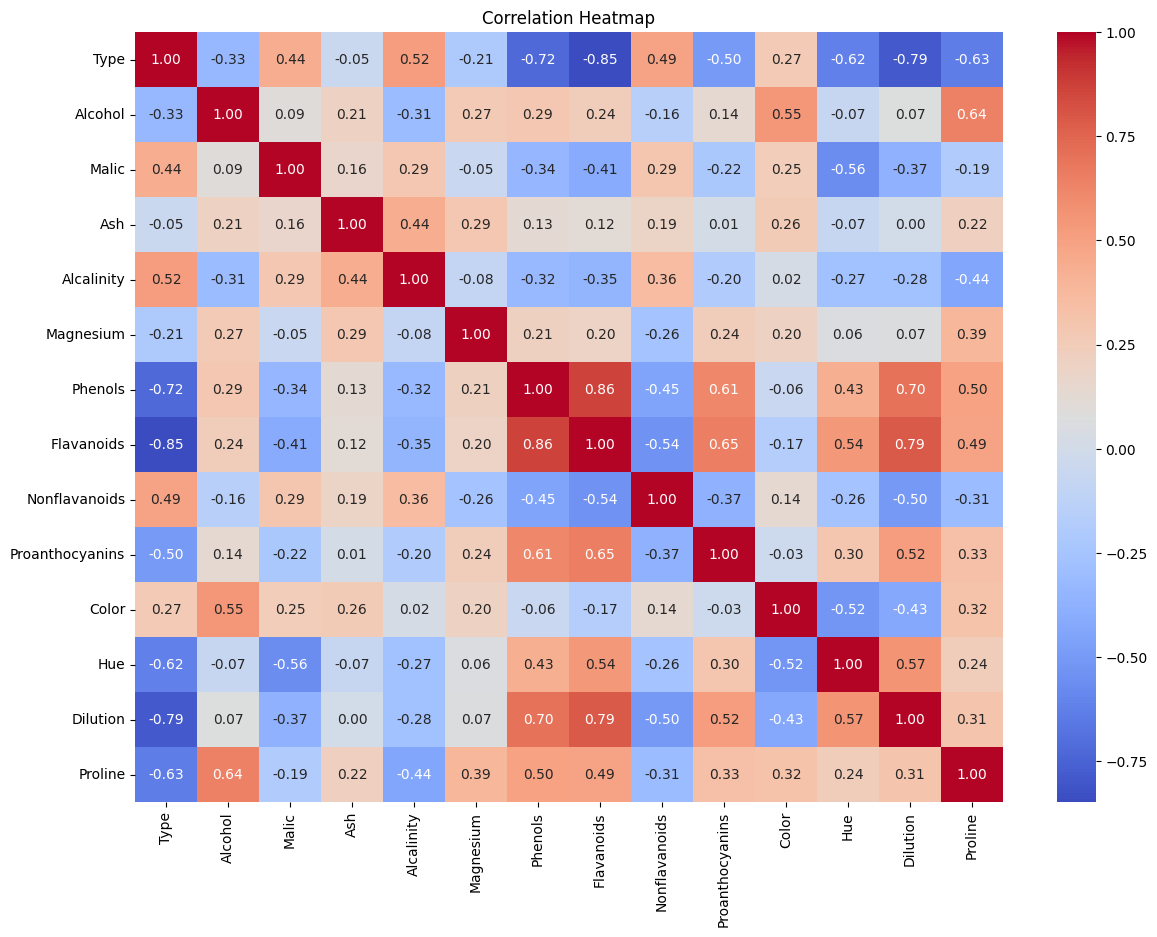

In [11]:
# Task 1: EDA
print(df.describe())
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
for i, col in enumerate(df.columns):
    ax = axes[i//3, i%3]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout(); plt.savefig('feature_histograms.png'); plt.close(fig)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
for i, col in enumerate(df.columns):
    ax = axes[i//3, i%3]
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout(); plt.show('feature_boxplots.png')

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm'); plt.title('Correlation Heatmap')
plt.show('correlation_heatmap.png')

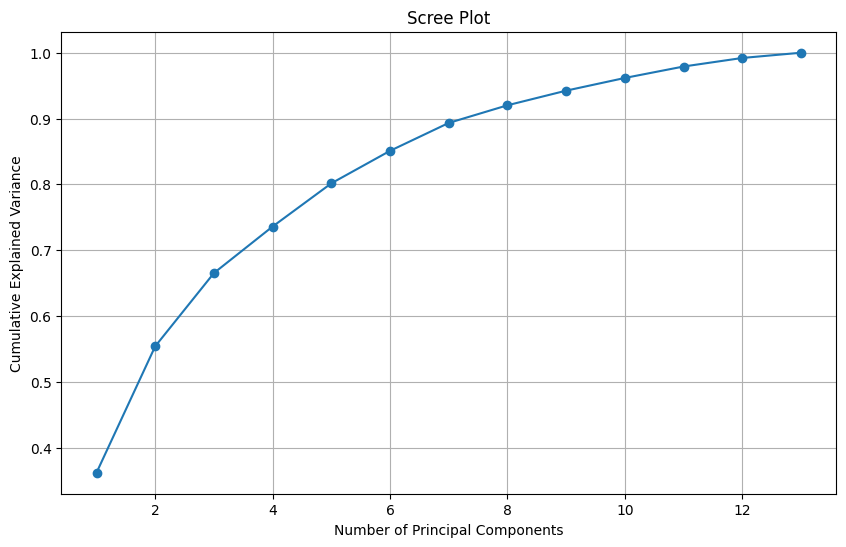

In [14]:
# Task 2: PCA
features = df.drop('Type', axis=1) if 'Type' in df.columns else df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA()
pca.fit(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(); plt.show('scree_plot.png')
optimal_pcs = np.argmax(explained_var > 0.90) + 1
X_pca = PCA(n_components=optimal_pcs).fit_transform(X_scaled)

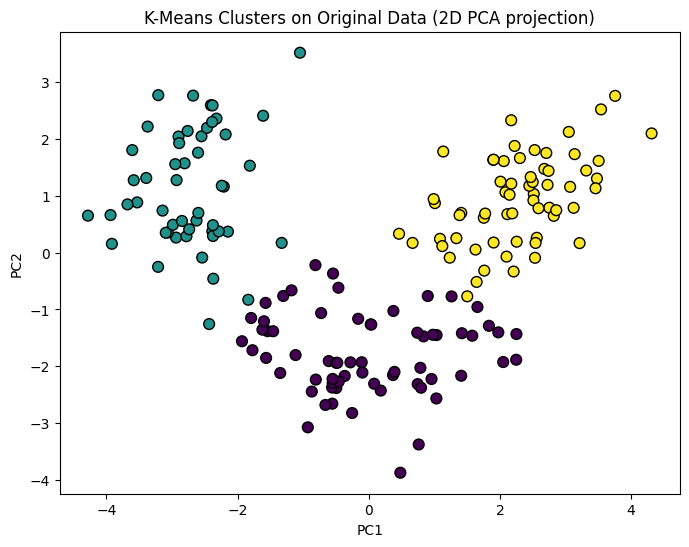

In [13]:
# Task 3: Clustering - Original Data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)
sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
X_2d = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_orig, cmap='viridis', s=60, edgecolor='k')
plt.title('K-Means Clusters on Original Data (2D PCA projection)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show('kmeans_original_cluster_plot.png'); plt.close()

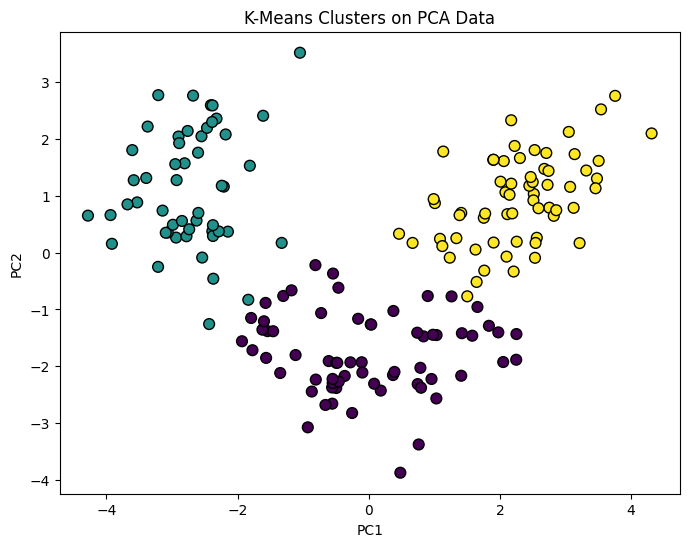

In [12]:
# Task 4: Clustering - PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)
sil_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_pca, cmap='viridis', s=60, edgecolor='k')
plt.title('K-Means Clusters on PCA Data')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show('kmeans_pca_cluster_plot.png'); plt.close()

In [9]:
# Task 5: Comparison and Analysis
comparison_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index'],
    'Original Data': [sil_orig, db_orig],
    'PCA Data': [sil_pca, db_pca]
})
comparison_table.to_csv('cluster_comparison.csv', index=False)
print(comparison_table)

                 Metric  Original Data  PCA Data
0      Silhouette Score       0.284859  0.314970
1  Davies-Bouldin Index       1.389188  1.266882
